In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

plt.rcParams['axes.facecolor'] = 'black'


FIG_WIDTH = 14
FIG_HEIGHT = 6

R = 5 # Dimension
T = 1460 # Time units 
L = 10 # Data points per Time unit
N = T * L # Data Points

""" Construction of R-Dimensional Brownian Motion """

# Define time interval
times = np.linspace(0,T,N)
dt = times[1] - times[0]

# Define initial conditions
B0_R = np.zeros(shape=(1,R))

# Define change in Brownian motion
dB_R = np.sqrt(dt) * np.random.normal(size=(N-1,R))

# Construct Sample Paths
B_R = np.concatenate((B0_R, np.cumsum(dB_R, axis=0)), axis=0)

""" Implementing Volatility and Drift """

# Define initial conditions
S0 = 100.0
S0_R = np.ones(shape=(1,R)) * S0

S0_R = S0_R + B0_R

# Implementing volatility and drift

sigma = 5.0 # Volatility
mu = 0.05 / T # Drift

# Define change in random process using volatility and drift
dS_R = ((mu * dt) * np.ones((N-1,R))  + sigma * dB_R)

# For geometric Brownian motion (drift is linear)



# Construct New Sample Paths
S_R = np.concatenate((S0_R, S0_R + np.cumsum(dS_R,axis=0)), axis=0)
#S_R = np.concatenate((S0_R, S0_R + np.cumsum(dS_R,axis=0) * S0), axis=0)

""" Calculating Moving Averages """

# Simple Moving Averages
MA_S_R = np.cumsum(S_R,axis=0) # Marginal Moving Averages in Dimension R
for j in range(1,N):
    MA_S_R[j] = MA_S_R[j] / (j+1)
    
JMA_S_R = np.sum(MA_S_R,axis=1) / R # Joint Moving Average in Dimension R

# M-Day Moving Averages
MA50_S_R = np.ones((N,R)) * S0 # Marginal 50-Day Moving Average
MA200_S_R = np.ones((N,R)) * S0 # Marginal 200-Day Moving Average

for i in range(N):
    if (i >= (50 * L)):
        MA50_S_R[i] = np.sum(S_R[(i-50*L):i],axis=0) / (50.0 * L) 
    if (i >= (200 * L)):
        MA200_S_R[i] = np.sum(S_R[(i-200*L):i],axis=0) / (200.0 * L)

JMA50_S_R = np.sum(MA50_S_R,axis=1) / R
JMA200_S_R = np.sum(MA200_S_R,axis=1) / R






<Figure size 640x480 with 0 Axes>

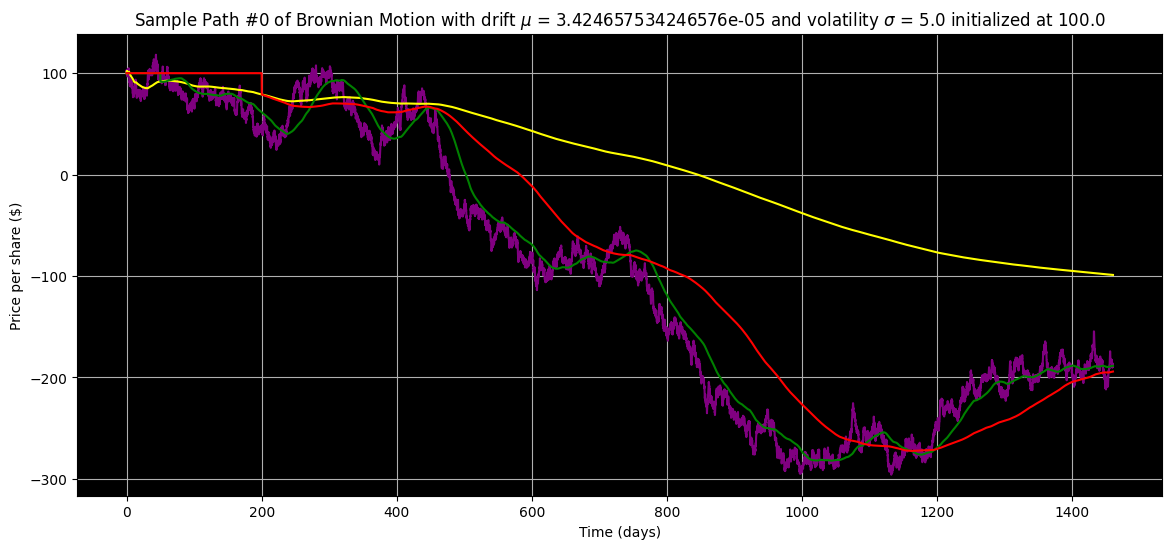

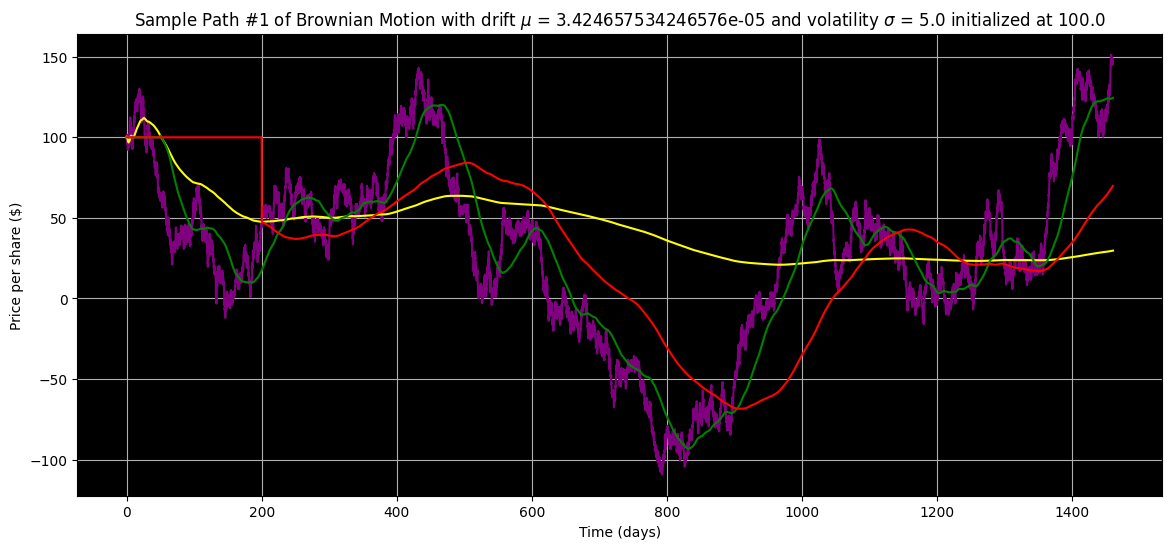

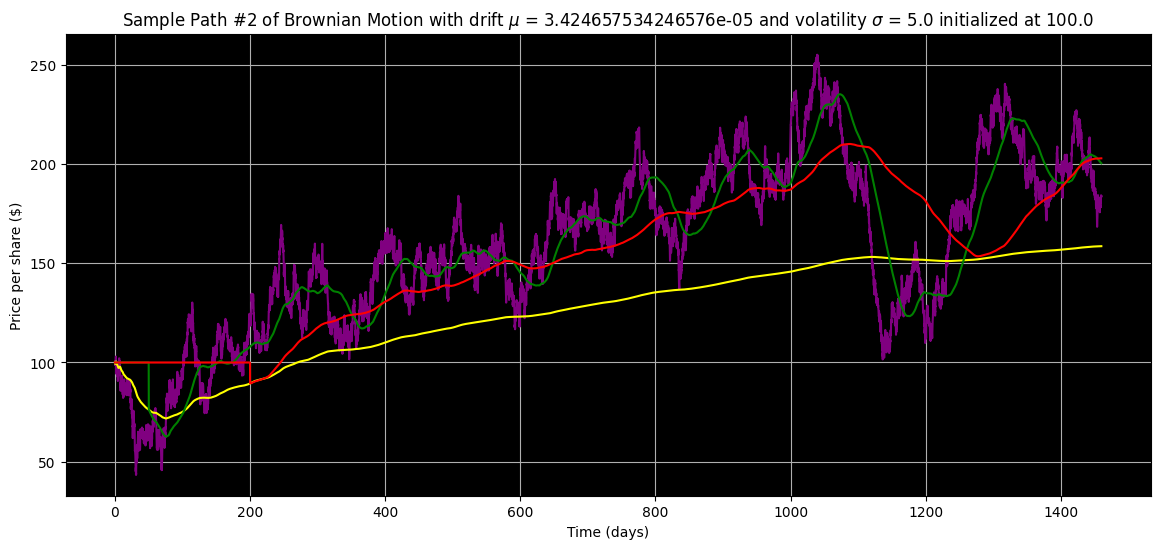

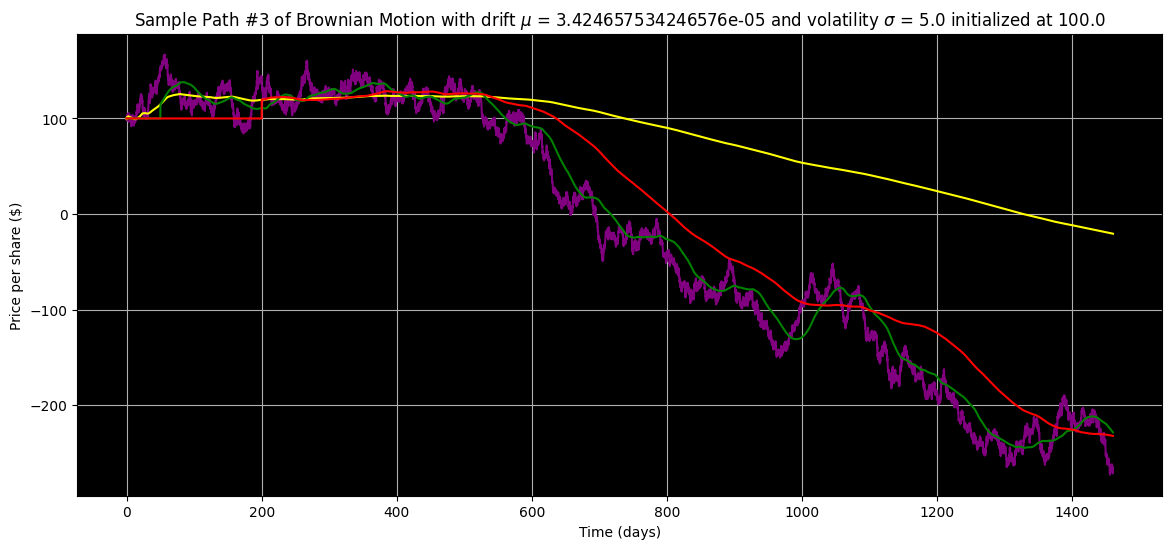

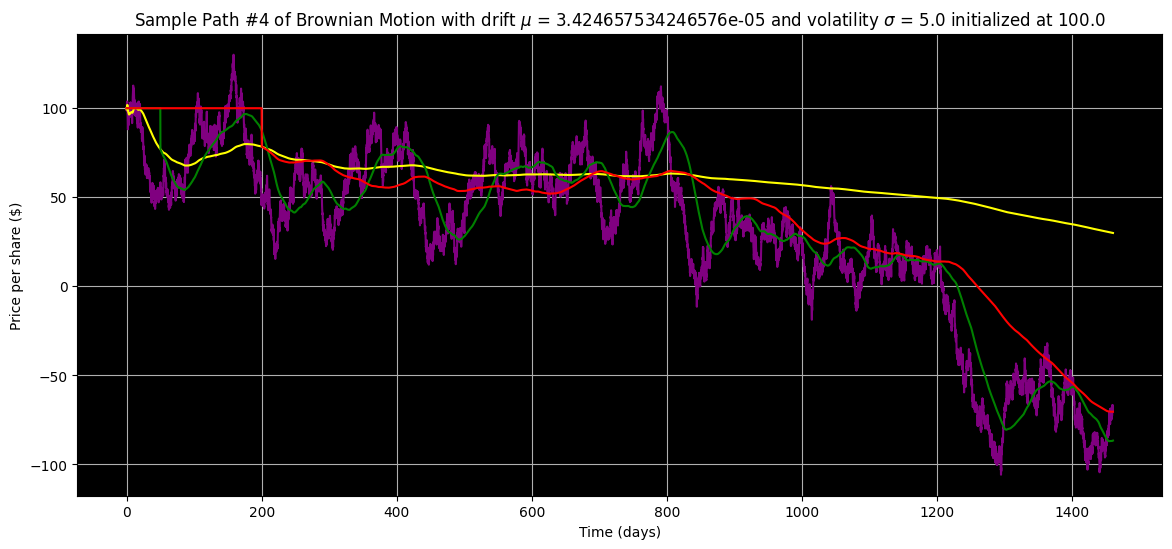

In [7]:
for j in range(R):
    path_j = [col[j] for col in S_R]
    path_ma_j = [col[j] for col in MA_S_R]
    path_ma50_j = [col[j] for col in MA50_S_R]
    path_ma200_j = [col[j] for col in MA200_S_R]
    plt.figure(j)
    plt.figure(figsize=(FIG_WIDTH,FIG_HEIGHT))
    plt.plot(times,path_j,color='purple')
    plt.plot(times,path_ma_j,color='yellow')
    plt.plot(times,path_ma50_j,color='green')
    plt.plot(times,path_ma200_j,color='red')
    plt.grid()
    plt.xlabel("Time (days)")
    plt.ylabel("Price per share ($)")
    plt.title(r"Sample Path #" + str(j) + " of Brownian Motion with drift $\mu$ = " +
          str(mu) + " and volatility $\sigma$ = " + str(sigma) + " initialized at " + str(S0))
  

Text(0.5, 1.0, 'Sample Paths of R-Dimensional Brownian Motion with drift $\\mu$ = 3.424657534246576e-05 and volatility $\\sigma$ = 5.0 initialized at 100.0')

<Figure size 640x480 with 0 Axes>

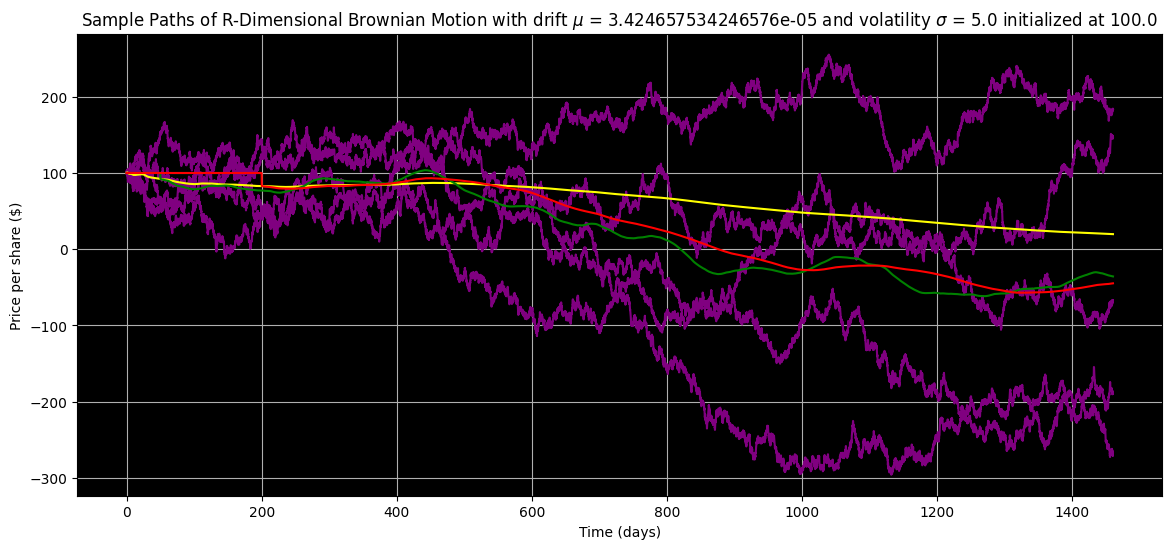

In [8]:
plt.figure(j+1)
plt.figure(figsize=(FIG_WIDTH,FIG_HEIGHT))
plt.plot(times,S_R,color='purple')
plt.plot(times,JMA_S_R,color='yellow')
plt.plot(times,JMA50_S_R,color='green')
plt.plot(times,JMA200_S_R,color='red')
plt.grid()
plt.xlabel("Time (days)")
plt.ylabel("Price per share ($)")
plt.title(r"Sample Paths of R-Dimensional Brownian Motion with drift $\mu$ = " +
          str(mu) + " and volatility $\sigma$ = " + str(sigma) + " initialized at " + str(S0))